# Libraries

In [1]:
import math    
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

### Exterior Penalty  Function  method  

In [2]:
def Iyy(beta, d):                     # pseudo-objective function
    mm = 59
    Aa = 1.4
    ro_a = 2.7
    zg = 3
    dr = 12
    f = 1.5
    mc = 600
    mq_bar = 1150
    Iyy = 4*( (d**2*mm + d**3*ro_a*Aa/3)*(np.sin(beta))**2 + zg**2*(mm + d*ro_a*Aa) )
    return Iyy

def g1(beta, d):                      # constraint 1
    dr = 12
    f = 1.5
    g1 = dr/2 + f - d*np.sin(beta)
    return g1

def g2(beta, d):                      # constraint 2
    dr = 12
    f = 1.5
    g2 = dr/2 + f - d*np.cos(beta)
    return g2

def g3(beta, d):                  # constraint 3
    Aa = 1.4
    mc = 600
    mm = 59
    mq_bar = 1150
    ro_a = 2.7
    g3 = mc + 4*(mm + d*ro_a*Aa) - mq_bar
    return g3

def g4(beta, d):                       # constraint 4
    g4 = -beta
    return g4

def g5(beta, d):                    # constraint 5
    g5 = beta - np.pi/2
    return g5

def g6(beta, d):                    # constraint 6
    g6 = 15 - d
    return g6

def g7(beta, d):                   # constraint 7
    g7 = d - 25
    return g7

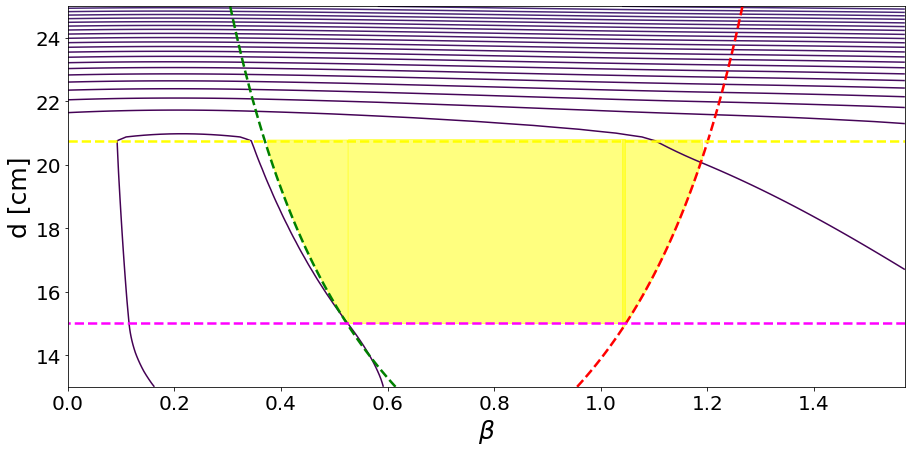

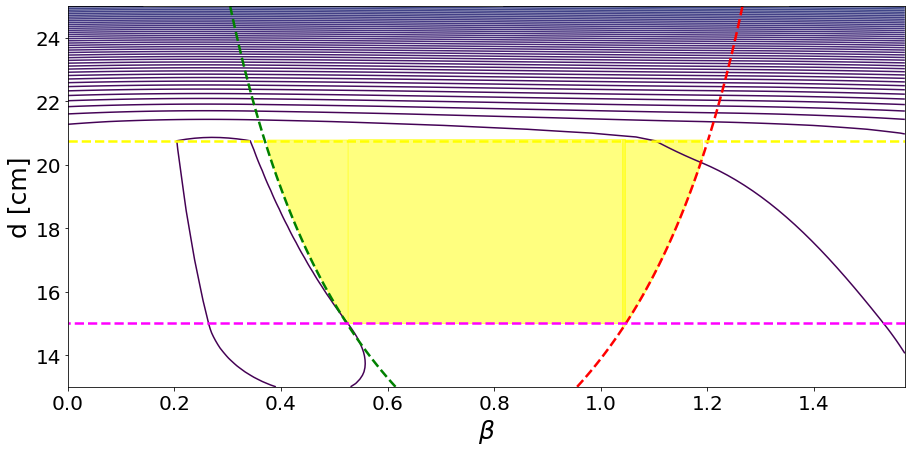

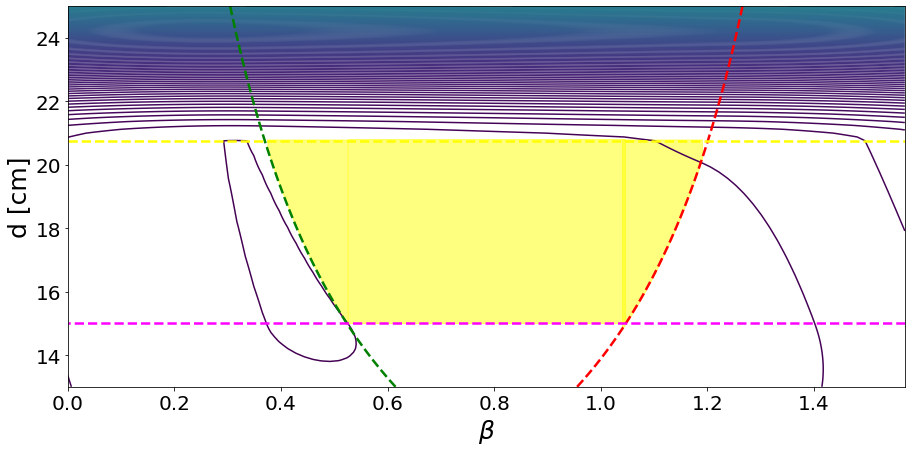

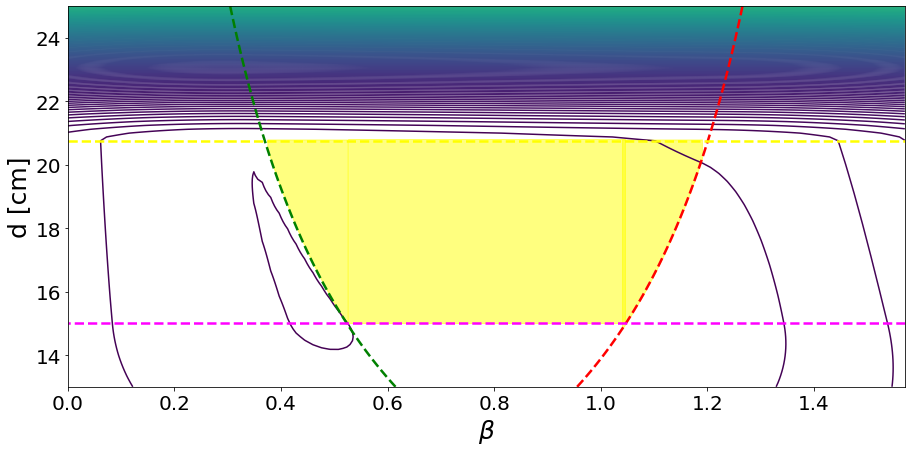

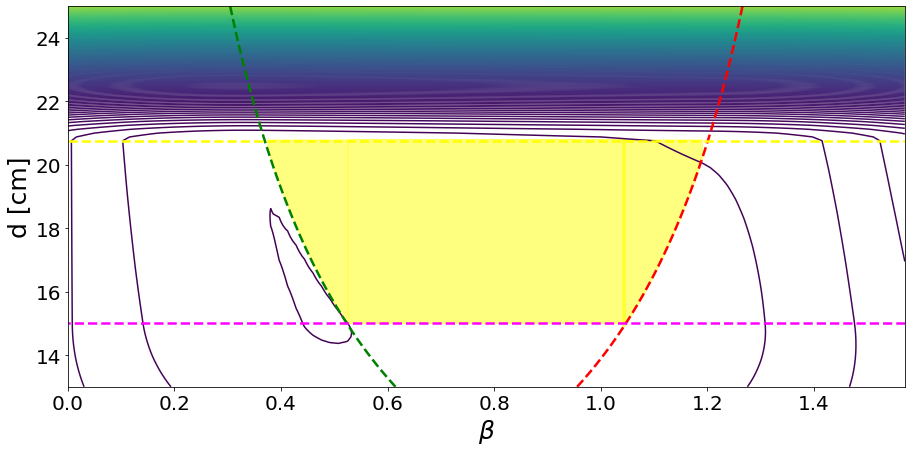

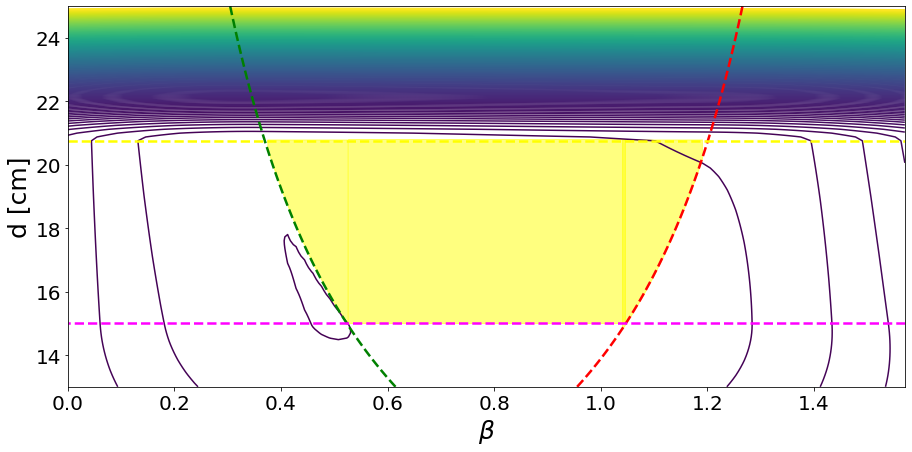

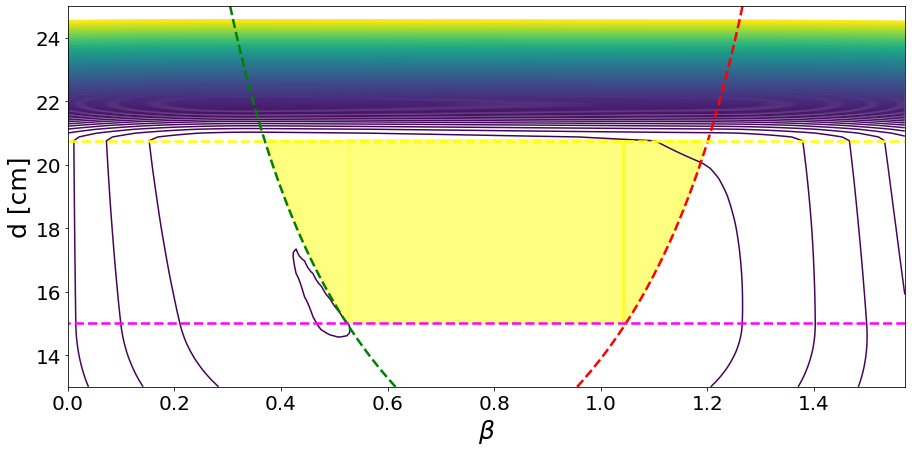

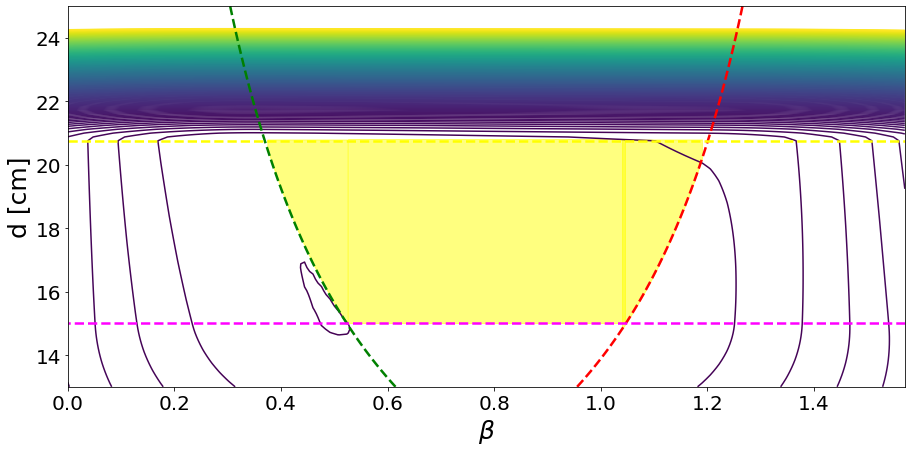

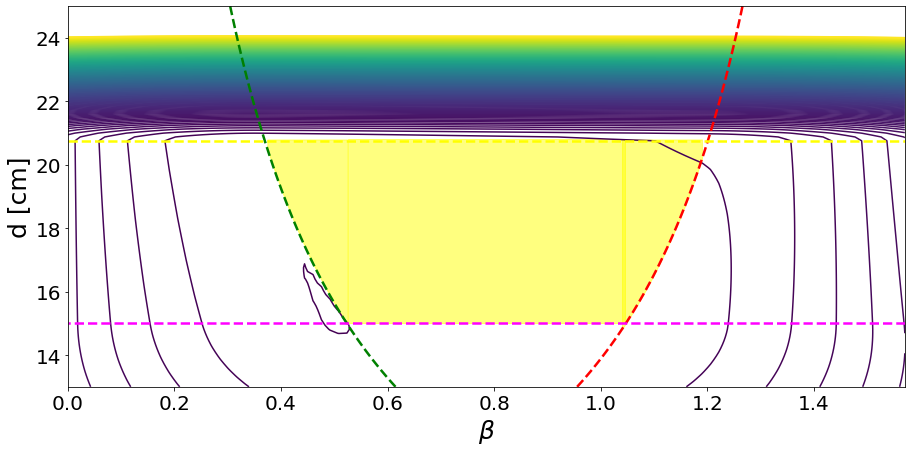

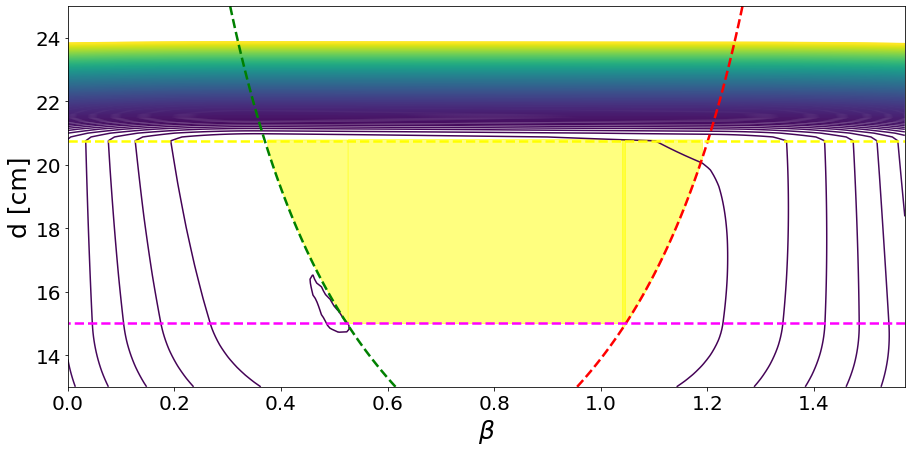

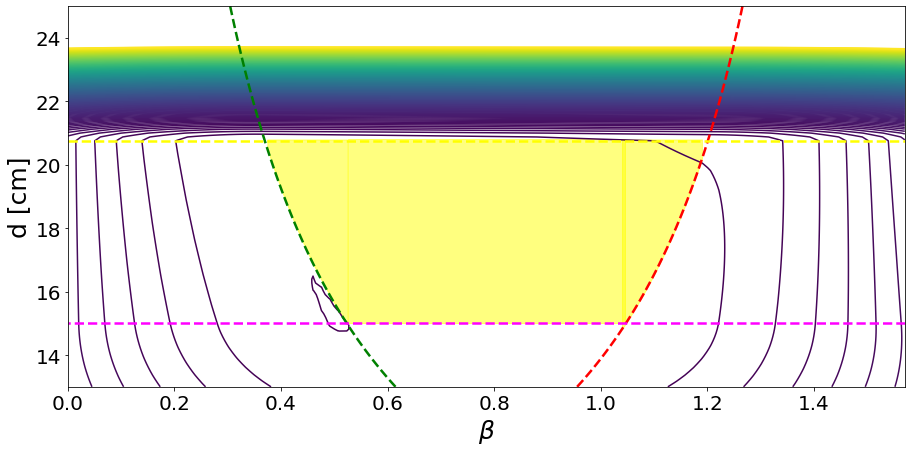

In [16]:
# penalization parameter list
r_ = [500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8e3, 9e3, 1e4] 

for i in range(len(r_)):
    # penalization parameter
    r = r_[i]
    
    # open figure window
    fig, ax = plt.subplots(figsize = (15, 7))

    # search parameters
    d_ = np.linspace(13, 25, 100)
    beta_ = np.linspace(0, np.pi/2, 100)
    beta, d = np.meshgrid(beta_, d_)

    # objective function
    Iyy_ = Iyy(beta,d) + r*(np.maximum(0, g1(beta,d))**2 + np.maximum(0, g2(beta,d))**2 + np.maximum(0, g3(beta,d))**2 + np.maximum(0, g4(beta,d))**2 + np.maximum(0, g5(beta,d))**2 + np.maximum(0, g6(beta,d))**2 + np.maximum(0, g7(beta,d))**2)

    # plot objective function
    levels = np.arange(21.8e3, 20021e3, 100e3)
    contours = plt.contour(beta, d, Iyy_, levels)
#     plt.clabel(contours, inline=True, fontsize=20, fmt='%1.0f')
    np.set_printoptions(precision = 0)

    # plot constraint 1
    plt.contour(beta, d, g1(beta,d), 0, colors = 'green', linewidths=2.5, linestyles = 'dashed')

    # plot constraint 2
    plt.contour(beta, d, g2(beta,d), 0, colors = 'red', linewidths=2.5, linestyles = 'dashed')

    # plot constraint 3 (mass)
    plt.contour(beta, d, g3(beta,d), 0, colors = 'yellow', linewidths=2.5, linestyles = 'dashed')

    # plot constraint 4 (minimum diameter)
    plt.contour(beta, d, g6(beta,d), 0, colors = 'magenta', linewidths=2.5, linestyles = 'dashed') 

    # highlight section
    dr = 12
    f = 1.5
    
    x = np.arange(1.04, 1.2, 0.01)
    y1 = (dr/2 + f)/np.cos(x)
    y2 = 20.8
    y3 = 15
    plt.fill_between(x, y1, y2, color = 'yellow', alpha = 0.5)          
    x = np.arange(0.525, 1.0451, 0.01)
    plt.fill_between(x, y2, y3, color = 'yellow', alpha = 0.5)          
    x = np.arange(0.3744 , 0.525, 0.01)
    y1 = (dr/2 + f)/np.sin(x)
    plt.fill_between(x, y1, y2, color = 'yellow', alpha = 0.5)          
    
    
    plt.ylim([13, 25])

    title = 'r = ' + str(r)

#     plt.title(title, fontsize = 25)
    plt.ylabel('d [cm]', fontsize = 25)
    plt.yticks(fontsize = 20, rotation=0)

    plt.xlabel(r'$\beta$', fontsize = 25)
    plt.xticks(fontsize = 20, rotation=0)

    savefig = 'list_05_r_' + str(r) + '.png'

    fig.savefig(savefig,dpi=300)                              # save figure as png

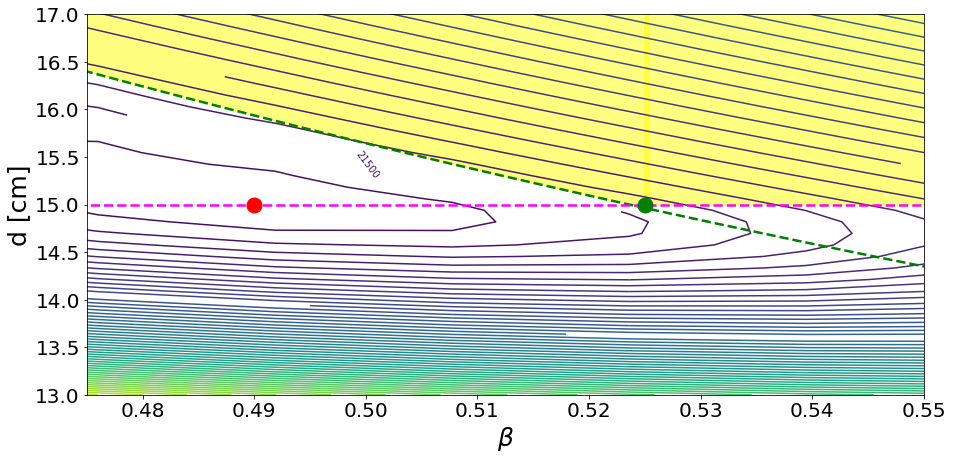

In [106]:
# penalization parameter
r = 5e3

# open figure window
fig, ax = plt.subplots(figsize = (15, 7))

# search parameters
d_ = np.linspace(13, 25, 100)
beta_ = np.linspace(0, np.pi/2, 100)
beta, d = np.meshgrid(beta_, d_)

# objective function
Iyy_ = Iyy(beta,d) + r*(np.maximum(0, g1(beta,d))**2 + np.maximum(0, g2(beta,d))**2 + np.maximum(0, g3(beta,d))**2 + np.maximum(0, g4(beta,d))**2 + np.maximum(0, g5(beta,d))**2 + np.maximum(0, g6(beta,d))**2 + np.maximum(0, g7(beta,d))**2)

# plot objective function
levels = np.arange(20e3, 50e3, 500)
contours = plt.contour(beta, d, Iyy_, levels)
plt.clabel(contours, inline=True, fontsize=10, fmt='%1.0f')
np.set_printoptions(precision = 0)

# plot constraint 1
plt.contour(beta, d, g1(beta,d), 0, colors = 'green', linewidths=2.5, linestyles = 'dashed')

# plot constraint 2
plt.contour(beta, d, g2(beta,d), 0, colors = 'red', linewidths=2.5, linestyles = 'dashed')

# plot constraint 3 (mass)
plt.contour(beta, d, g3(beta,d), 0, colors = 'yellow', linewidths=2.5, linestyles = 'dashed')

# plot constraint 4 (minimum diameter)
plt.contour(beta, d, g6(beta,d), 0, colors = 'magenta', linewidths=2.5, linestyles = 'dashed') 

# highlight section
dr = 12
f = 1.5

x = np.arange(1.04, 1.2, 0.01)
y1 = (dr/2 + f)/np.cos(x)
y2 = 20.8
y3 = 15
plt.fill_between(x, y1, y2, color = 'yellow', alpha = 0.5)          
x = np.arange(0.525, 1.0451, 0.001)
plt.fill_between(x, y2, y3, color = 'yellow', alpha = 0.5)          
x = np.arange(0.3744 , 0.526, 0.001)
y1 = (dr/2 + f)/np.sin(x)
plt.fill_between(x, y1, y2, color = 'yellow', alpha = 0.5)          

plt.plot(0.49,15.00,color='red',marker='o',markersize=15)
plt.plot(0.525,15.00,color='green',marker='o',markersize=15)

plt.xlim([0.475, 0.55])
plt.ylim([13, 17])

title = 'r = ' + str(r)

#     plt.title(title, fontsize = 25)
plt.ylabel('d [cm]', fontsize = 25)
plt.yticks(fontsize = 20, rotation=0)

plt.xlabel(r'$\beta$', fontsize = 25)
plt.xticks(fontsize = 20, rotation=0)

savefig = 'list_05_r_' + str(r) + 'zoomed.png'

fig.savefig(savefig,dpi=300)                              # save figure as png